<font size ="8"> <div align="center">**Use of Modern Regression for Causal Inference on Wage Prediction Exercise**</div></font>
<font size ="5"> <div align="center">By **Jon Nyner Gavan**</div></font>

---------------
# **Context of the Exercise (Wage Prediction 2:  using Modern Regression Algorithm)**
---------------

In this section, the quality of the predictions provided by modern approaches will be displayed by carrying out a similar study to the Wage Prediction exercise previously.


Modern Regression Methods, namely **Lasso**, **Random Forest**, **Boosted Trees**, and **Neural Networks**, when appropriately tuned and under some regularity conditions, provide estimated prediction rules $\hat{g}$ that approximate the best prediction rule g(Z).

-----------------------------
## **Data Description:**
-----------------------------

The dataset is an extended version of the previous Wage Prediction data that contains 37 features composed of both numerical and encoded categorical data.

-----------------------------
## **Objectives of the Exercise**
-----------------------------
For this exercise, the same Wage prediction analysis will be carried out but using modern regression algorithms listed above. Comparison of results will be presented and the effectivity of modern regression algorithms will be commented on.

### **Importing the necessary libraries and overview of the dataset**

**Importing Libraries**

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Mounting Google Drive and Loading the Data**

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
# Loading the test and training data
train = pd.read_csv("wage2015_train.csv") # importing train dataset
test = pd.read_csv("wage2015_test.csv")# importing test dataset

**Quick look at the Data**

In [ ]:
# first 5 records of training dataset
train.head()

,wage,lwage,sex,white,black,hisp,shs,hsg,scl,clg,...,health,age,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,11.639676,2.454420,0,1,0,0,0,0,1,0,...,1,62,40.0,16.00,64.000,256.0000,4620.0,15,8290.0,18
1,26.442308,3.274965,0,1,0,0,0,0,0,1,...,1,23,0.0,0.00,0.000,0.0000,2300.0,8,8470.0,18
2,20.000000,2.995732,1,1,0,0,0,0,0,1,...,1,31,7.0,0.49,0.343,0.2401,2720.0,9,8590.0,19
3,26.442308,3.274965,1,1,0,0,0,0,0,1,...,0,31,7.0,0.49,0.343,0.2401,5300.0,17,8660.0,20
4,25.480769,3.237924,0,1,0,0,0,0,0,1,...,1,28,4.0,0.16,0.064,0.0256,40.0,1,7470.0,14


In [ ]:
 # first 5 records of test dataset
test.head()

,wage,lwage,sex,white,black,hisp,shs,hsg,scl,clg,...,health,age,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,9.615385,2.263364,0,1,0,0,0,0,0,1,...,1,31,7.0,0.49,0.343,0.2401,3600.0,11,8370.0,18
1,11.538462,2.445686,1,1,0,0,0,0,1,0,...,1,35,13.0,1.69,2.197,2.8561,6050.0,18,170.0,1
2,28.846154,3.361977,0,1,0,0,0,0,0,1,...,0,46,22.0,4.84,10.648,23.4256,2015.0,6,9470.0,22
3,19.230769,2.956512,1,1,0,0,0,1,0,0,...,1,57,37.0,13.69,50.653,187.4161,5240.0,17,5680.0,9
4,11.500000,2.442347,1,1,0,0,0,1,0,0,...,0,23,3.0,0.09,0.027,0.0081,8740.0,21,7790.0,16


**Understanding the shape of the data and its data types**

In [ ]:
# Viewing the number of rows and columns
print(f"There are {train.shape[0]} rows and {train.shape[1]} columns.")

In [ ]:
# Checking info of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6348 entries, 0 to 6347
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      6348 non-null   float64
 1   lwage     6348 non-null   float64
 2   sex       6348 non-null   int64  
 3   white     6348 non-null   int64  
 4   black     6348 non-null   int64  
 5   hisp      6348 non-null   int64  
 6   shs       6348 non-null   int64  
 7   hsg       6348 non-null   int64  
 8   scl       6348 non-null   int64  
 9   clg       6348 non-null   int64  
 10  mw        6348 non-null   int64  
 11  so        6348 non-null   int64  
 12  we        6348 non-null   int64  
 13  union     6348 non-null   int64  
 14  vet       6348 non-null   int64  
 15  cent      6348 non-null   int64  
 16  ncent     6348 non-null   int64  
 17  fam1      6348 non-null   int64  
 18  fam2      6348 non-null   int64  
 19  fam3      6348 non-null   int64  
 20  child     6348 non-null   int6

- The dataset has 6348 observations and 37 different variables.
- There are no missing values in the dataset.

### **Exploratory Data Analysis Analysis**

> **Checking the summary statistics of the dataset**

In [ ]:
# Printing the summary statistics for the dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
wage,6348.0,18.151370,10.390258,0.015385,10.576923,15.384615,23.367102,57.692308
lwage,6348.0,2.735925,0.602504,-4.174387,2.358675,2.733368,3.151328,4.055124
sex,6348.0,0.541115,0.498346,0.000000,0.000000,1.000000,1.000000,1.000000
white,6348.0,0.697385,0.459426,0.000000,0.000000,1.000000,1.000000,1.000000
black,6348.0,0.184625,0.388024,0.000000,0.000000,0.000000,0.000000,1.000000
hisp,6348.0,0.225425,0.417895,0.000000,0.000000,0.000000,0.000000,1.000000
shs,6348.0,0.062697,0.242436,0.000000,0.000000,0.000000,0.000000,1.000000
hsg,6348.0,0.307656,0.461560,0.000000,0.000000,0.000000,1.000000,1.000000
scl,6348.0,0.299779,0.458197,0.000000,0.000000,0.000000,1.000000,1.000000
clg,6348.0,0.239918,0.427067,0.000000,0.000000,0.000000,0.000000,1.000000


**Observations:**
- The average wage is about 18 dollars while the highest wage is 58 and lowest is 0.015385.
- Average age is 34 years, while min and max are from 16 to 40 years, which shows the data is diverse and is taken from different age groups.
- Average experience is 12 years, while min and max from 0 to 65 years, which shows the data is diverse and is taken from different experience groups.

> **Checking `wage` and `lwage` columns**

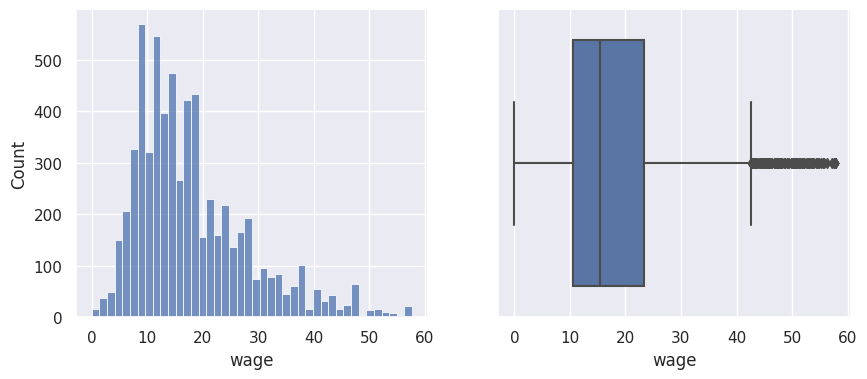

In [ ]:
#Plotting the Distribution of Wages

fig = plt.figure(figsize=(10,4))

#  subplot #1
plt.subplot(121)
sns.histplot(data = train, x = 'wage')

#  subplot #2
plt.subplot(122)
sns.boxplot(data = train, x = 'wage')

plt.show()

- This is a plot of the target variable, which is the log of the wage. The variable has a right-skewed distribution. There are outliers in the wage variable, which makes it reasonable because have high wages as compared to others. To reduce skewness in modeling, the variable must be log-transformed.

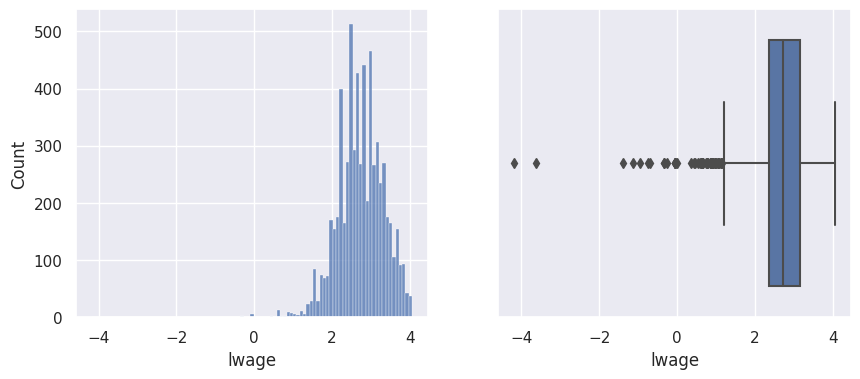

In [ ]:
#Plotting the Distribution of logarithm of wages

fig = plt.figure(figsize=(10,4))

#  subplot #1
plt.subplot(121)
sns.histplot(data = train, x = 'lwage')

#  subplot #2
plt.subplot(122)
sns.boxplot(data = train, x = 'lwage')

plt.show()

- After log transformation, the wage variable follows normal distribution but is a little left-skewed and and there are outliers.

> **Checking `age` column**

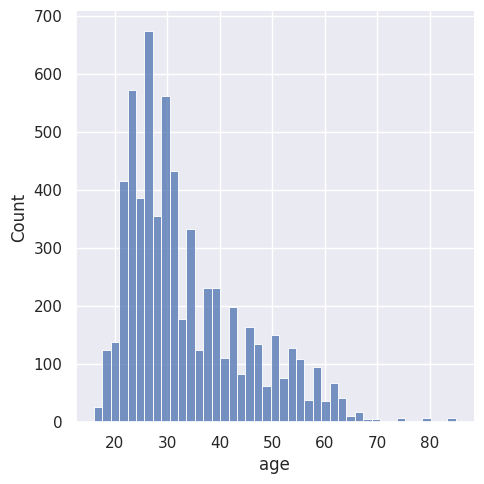

In [ ]:
# Plotting the distribution of Age
sns.displot(x='age',data=train)
plt.show()

- We can observe from the plot that the data is collected from various age groups. The majority of the data we have come from people between the ages of 20 and 30.One explanation for this is that the number of persons who have never married tends to decline as they get aged.

> **Checking the `sex` column**

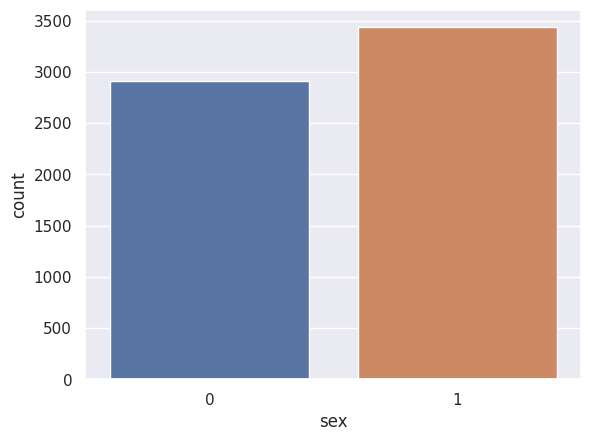

In [ ]:
# Generating a Barplot for sex
sns.countplot(x="sex", data=train)
plt.show()

- Our data seems pretty balanced in case of gender which is good.

### **Training Machine Learning Models**

#### **Data Preparation for Modeling**

*Setting the predictors*

In [ ]:
# Declaring the columns to be included for each model

# Linear Control Variables. Use This Control Variables for Tree Based Machine Learning Methods.
x_col = ["sex","white","black","hisp","shs","hsg","scl","clg","mw","so","we","union","vet","cent","ncent","fam1","fam2","fam3","child","fborn","cit","school","pens","fsize10","fsize100","health","age","exp1","occ2","ind2"]

# Quadratic Control Variables (Flexible Specification). Use This Control Variables for Linear methods
xL_col = ["sex","white","black","hisp","shs","hsg","scl","clg","mw","so","we","union","vet","cent","ncent","fam1","fam2","fam3","child","fborn","cit","school","pens","fsize10","fsize100","health","age","exp1","exp2","exp3","exp4","occ2","ind2"]

In [ ]:
# Defining independent and dependent variables

# The training and testing predictors/regressors
X_train = train[x_col]
X_test = test[x_col]

# outcome variable log wage
y_train = train['lwage']
y_test = test['lwage']

#### **Linear Models**


In linear models, we estimate
$\hat{g}(Z)$= βˆ$^r$ X , we can generate X in two ways:

1. basic model -  X consists of 72 raw regressors Z and a constant;

2. flexible model - X consists of Z , four polynomials in experience, and all two-way interactions of these variables; this gives us 2336 regressors;

We estimate $\hat{β}$ by linear regression/least squares and by penalized regression methods **Lasso**, **Cross-Validated Lasso**, **Ridge**, and **Elastic Net**.

In [ ]:
# preparing the quadratic large specification data for train and test
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
XL_train = train[xL_col]
XL_test = test[xL_col]
XL_train_poly = poly.fit_transform(XL_train)
XL_train_poly = pd.DataFrame(XL_train_poly,columns= poly.get_feature_names_out(XL_train.columns))
XL_test_poly = poly.transform(XL_test)
XL_test_poly = pd.DataFrame(XL_test_poly,columns= poly.get_feature_names_out(XL_test.columns))

In [ ]:
from sklearn.linear_model import LinearRegression
# Linear Model: Quadratic (Large) Specification without intercept
model_train_L = LinearRegression(fit_intercept=False)
model_train_L.fit(XL_train,y_train)
model_test_L = LinearRegression(fit_intercept=False)
model_test_L.fit(XL_test,y_test)


# Linear Model: Linear Specification without intercept
model_train = LinearRegression(fit_intercept=False)
model_train.fit(X_train,y_train)
model_test = LinearRegression(fit_intercept=False)
model_test.fit(X_test,y_test)

LinearRegression(fit_intercept=False)

In [ ]:
# Linear Model: Linear Specification with intercept
model_lm = LinearRegression()
model_lm.fit(X_train,y_train)

# Linear Model: Quadratic (Large) Specification with intercept
model_lm2 = LinearRegression()
model_lm2.fit(XL_train,y_train)

LinearRegression()

In [ ]:
# Initiating Penalized Regression methods on Basic Models

from sklearn.linear_model import Lasso, LassoCV, RidgeCV, ElasticNetCV
# basic lasso model on original data
model_lasso = Lasso()
model_lasso.fit(X_train,y_train)

# lassocv model on original data
model_lasso_cv = LassoCV(alphas=[1],cv = 11,n_jobs = -1) # cv - number of cross validations to be checked, n_jobs = -1 - use all the parallel processing power of the system
model_lasso_cv.fit(X_train,y_train)

#ridgecv model on original data
model_ridge_cv = RidgeCV(alphas=[1e-3],cv = 11)
model_ridge_cv.fit(X_train,y_train)

#elasticnetcv model on original data
model_elasticnet_cv = ElasticNetCV(alphas=[0.5],cv = 11,n_jobs = -1)
model_elasticnet_cv.fit(X_train,y_train)

ElasticNetCV(alphas=[0.5], cv=11, n_jobs=-1)

In [ ]:
# Initiating Penalized Regression methods on Flexible Quadratic Large Models

# basic lasso model on quadratic transform data
model_lasso_L = Lasso()
model_lasso_L.fit(XL_train,y_train)

# lasso cv model on quadratic transform data
model_lasso_cv_L = LassoCV(alphas=[1],cv = 11,n_jobs = -1)
model_lasso_cv_L.fit(XL_train,y_train)

# ridge cv model on quadratic transform data
model_ridge_cv_L = RidgeCV(alphas=[1e-3],cv = 11)
model_ridge_cv_L.fit(XL_train,y_train)

# elasticnet cv model on quadratic transform data
model_elasticnet_cv_L = ElasticNetCV(alphas=[0.5],cv = 11,n_jobs = -1)
model_elasticnet_cv_L.fit(XL_train,y_train)

ElasticNetCV(alphas=[0.5], cv=11, n_jobs=-1)

#### **Non-Linear Models**


In nonlinear models, we estimate the prediction rule of the form $\hat{g}(Z)$. We use **Random Forest**, **Regression Trees**, and **Boosted Trees** to estimate them.

In [ ]:
# Initializing RandomForest and GradientBoosting Regressors

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# random forest regresison on original data

rf = RandomForestRegressor(n_estimators=2000,min_samples_leaf=5) # n_estimators - The number of trees in the forest, min_samples_leaf - The minimum number of samples required to be at a leaf node.
rf.fit(X_train,y_train)

# gradient boost regression on original data
gbr = GradientBoostingRegressor(n_estimators=1000,min_weight_fraction_leaf=0.5,max_depth=2,learning_rate=0.01)
# max_depth - The maximum depth of the tree
# min_weight_fraction_leaf - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node

gbr.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=2,
                          min_weight_fraction_leaf=0.5, n_estimators=1000)

In [ ]:
# Initializing RandomForest and GradientBoosting Regressors

from sklearn.tree import DecisionTreeRegressor
# decision tree regresison on original data
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pruned = DecisionTreeRegressor(max_depth=5)
dt_pruned.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

#### **Predictions on test data for all Models built**

*Predicting Wages using each Model*

In [ ]:
# predictions on test data for all the models build so far

y_pred_lm = model_lm.predict(X_test)
y_pred_lm2 = model_lm2.predict(XL_test)
y_pred_lasso = model_lasso.predict(X_test)
y_pred_lasso_cv = model_lasso_cv.predict(X_test)
y_pred_ridge_cv = model_ridge_cv.predict(X_test)
y_pred_elasticnet_cv = model_elasticnet_cv.predict(X_test)
y_pred_lasso_L = model_lasso_L.predict(XL_test)
y_pred_lasso_cv_L = model_lasso_cv_L.predict(XL_test)
y_pred_ridge_cv_L = model_ridge_cv_L.predict(XL_test)
y_pred_elasticnet_cv_L = model_elasticnet_cv_L.predict(XL_test)
y_pred_rf = rf.predict(X_test)
y_pred_gbr = gbr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_dt_pruned = dt_pruned.predict(X_test)

*Evaluating the Models' performances*

In [ ]:
# Evaluating the models performance

from sklearn.metrics import r2_score,mean_squared_error
# linear model metrics
lm_r2 = r2_score(y_test,y_pred_lm)
lm_mse = mean_squared_error(y_test,y_pred_lm)
print("lm_r2",lm_r2)
print("lm_mse",lm_mse)
print()

# quadratic model metrics
lm2_r2 = r2_score(y_test,y_pred_lm2)
lm2_mse = mean_squared_error(y_test,y_pred_lm2)
print("lm2_r2",lm2_r2)
print("lm2_mse",lm2_mse)
print()

# lasso model metrics
lasso_r2 = r2_score(y_test,y_pred_lasso)
lasso_mse = mean_squared_error(y_test,y_pred_lasso)
print("lasso_r2",lasso_r2)
print("lasso_mse",lasso_mse)
print()

# lassocv model metrics
lasso_cv_r2 = r2_score(y_test,y_pred_lasso_cv)
lasso_cv_mse = mean_squared_error(y_test,y_pred_lasso_cv)
print("lasso_cv_r2",lasso_cv_r2)
print("lasso_cv_mse",lasso_cv_mse)
print()

# ridgecv model metrics
ridge_cv_r2 = r2_score(y_test,y_pred_ridge_cv)
ridge_cv_mse = mean_squared_error(y_test,y_pred_ridge_cv)
print("ridge_cv_r2",ridge_cv_r2)
print("ridge_cv_mse",ridge_cv_mse)
print()

# elasticnetcv model metrics
elasticnet_cv_r2 = r2_score(y_test,y_pred_elasticnet_cv)
elasticnet_cv_mse = mean_squared_error(y_test,y_pred_elasticnet_cv)
print("elasticnet_cv_r2",elasticnet_cv_r2)
print("elasticnet_cv_mse",elasticnet_cv_mse)
print()

# lasso on quadratic data metrics
lasso_L_r2 = r2_score(y_test,y_pred_lasso_L)
lasso_L_mse = mean_squared_error(y_test,y_pred_lasso_L)
print("lasso_L_r2",lasso_L_r2)
print("lasso_L_mse",lasso_L_mse)
print()

# lassocv on quadratic data metrics
lasso_cv_L_r2 = r2_score(y_test,y_pred_lasso_cv_L)
lasso_cv_L_mse = mean_squared_error(y_test,y_pred_lasso_cv_L)
print("lasso_cv_L_r2",lasso_cv_L_r2)
print("lasso_cv_L_mse",lasso_cv_L_mse)
print()

# ridgecv on quadratic data metrics
ridge_cv_L_r2 = r2_score(y_test,y_pred_ridge_cv_L)
ridge_cv_L_mse = mean_squared_error(y_test,y_pred_ridge_cv_L)
print("ridge_cv_L_r2",ridge_cv_L_r2)
print("ridge_cv_L_mse",ridge_cv_L_mse)
print()

# elasticnetcv on quadratic data metrics
elasticnet_cv_L_r2 = r2_score(y_test,y_pred_elasticnet_cv_L)
elasticnet_cv_L_mse = mean_squared_error(y_test,y_pred_elasticnet_cv_L)
print("elasticnet_cv_L_r2",elasticnet_cv_L_r2)
print("elasticnet_cv_L_mse",elasticnet_cv_L_mse)
print()

# randomforest model metrics
rf_r2 = r2_score(y_test,y_pred_rf)
rf_mse = mean_squared_error(y_test,y_pred_rf)
print("rf_r2",rf_r2)
print("rf_mse",rf_mse)
print()

# gradientboost model metrics
gbr_r2 = r2_score(y_test,y_pred_gbr)
gbr_mse = mean_squared_error(y_test,y_pred_gbr)
print("gbr_r2",gbr_r2)
print("gbr_mse",gbr_mse)
print()

# decision tree model metrics
dt_r2 = r2_score(y_test,y_pred_dt)
dt_mse = mean_squared_error(y_test,y_pred_dt)
print("dt_r2",dt_r2)
print("dt_mse",dt_mse)
print()

# pruned decision tree model metrics
dt_pruned_r2 = r2_score(y_test,y_pred_dt_pruned)
dt_pruned_mse = mean_squared_error(y_test,y_pred_dt_pruned)
print("dt_pruned_r2",dt_pruned_r2)
print("dt_pruned_mse",dt_pruned_mse)

lm_r2 0.2564591769934085
lm_mse 0.3127664499897118

lm2_r2 0.2602708126287935
lm2_mse 0.31116310595069446

lasso_r2 0.04811131393532875
lasso_mse 0.4004068585258824

lasso_cv_r2 0.04811131393532875
lasso_cv_mse 0.4004068585258824

ridge_cv_r2 0.2564592773311202
ridge_cv_mse 0.31276640778319276

elasticnet_cv_r2 0.11137542178631354
elasticnet_cv_mse 0.3737951516604702

lasso_L_r2 0.04811131393532875
lasso_L_mse 0.4004068585258824

lasso_cv_L_r2 0.04811131393532875
lasso_cv_L_mse 0.4004068585258824

ridge_cv_L_r2 0.2602709108026534
ridge_cv_L_mse 0.3111630646543881

elasticnet_cv_L_r2 0.12063635718219501
elasticnet_cv_L_mse 0.36989958897214126

rf_r2 0.28734728200234816
rf_mse 0.29977353466935175

gbr_r2 -0.0002358120438648026
gbr_mse 0.420743817159267

dt_r2 -0.2921741931419217
dt_mse 0.5435461277339123

dt_pruned_r2 0.22385119365649309
dt_pruned_mse 0.32648282288282504


### **Conclusion:**

- The above result shows results for a single split of data into the training and testing part. We can observe that the Random Forest prediction algorithm performs the best here, with the lowest testing MSE or highest R-squared.

- Other methods, such as the quadratic model, Cross-Validated Ridge, and Pruned regression tree, do similarly well.

- **Remarkably** , OLS on a simple model with 72 regressors performs extremely well, almost as well as the sophisticated version of Random Forest.
- Since the performance of OLS on a simple model is statistically indistinguishable from that of Random Forest, we may choose this method to be the winner here as OLS method is more interpretable than random forest and using the coefficient of variables in the OLS method we can select the more important features with valid reasons.